In [9]:
#dataset is Mental Health Client-Level Data from SAMHSA
#https://www.datafiles.samhsa.gov/dataset/mental-health-client-level-data-2021-mh-cld-2021-ds0001

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/colab_notebooks')
!ls

colab_t-sne_mental_health_client-level_data.ipynb  pca_mental-health_client-level.png
mhcld_puf_2021.csv				   plots


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/content/drive/MyDrive/colab_notebooks/mhcld_puf_2021.csv')

In [7]:
data.columns

Index(['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'DIVISION', 'REGION', 'CASEID'],
      dtype='object')

In [8]:
#drop YEAR since all same
#drop CASEID since index column
#need to one-hot encode categorical data
#TRAUSTREFLG=Trauma- and stressor-related disorders
#ANXIETYFLG=Anxiety disorders
#ADHDFLG=Attention deficit/hyperactivity disorder (ADHD)
#BIPOLARFLG=Bipolar disorders
#DEPRESSFLG=Depressive disorders
#SCHIZOFLG=Schizophrenia or other psychotic disorders
#PERSONFLG=Personality disorders
disorder_cols = ['TRAUSTREFLG','ANXIETYFLG','ADHDFLG','BIPOLARFLG','DEPRESSFLG','SCHIZOFLG','PERSONFLG']
data = data[disorder_cols]

In [9]:
data.head()

,TRAUSTREFLG,ANXIETYFLG,ADHDFLG,BIPOLARFLG,DEPRESSFLG,SCHIZOFLG,PERSONFLG
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,1,1,0,0,1,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6509025 entries, 0 to 6509024
Data columns (total 7 columns):
 #   Column       Dtype
---  ------       -----
 0   TRAUSTREFLG  int64
 1   ANXIETYFLG   int64
 2   ADHDFLG      int64
 3   BIPOLARFLG   int64
 4   DEPRESSFLG   int64
 5   SCHIZOFLG    int64
 6   PERSONFLG    int64
dtypes: int64(7)
memory usage: 347.6 MB


In [109]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#perform PCA without CAS connection
from sklearn import datasets, decomposition
#fill missing values
#X = data.fillna(data.mean())
#drop missing values
NUM_POINTS = 10_000
X = data.dropna()
X = X[:NUM_POINTS]
n_samples = X.shape[0]

In [110]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X.shape

(10000, 7)

In [111]:
#https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca
# We center the data and compute the sample covariance matrix
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

0.2697331489214236
0.2697601249339161
0.1802692756804058
0.18028730441084717
0.15969005408546816
0.15970602468793743


In [112]:
#create pandas dataframes from label and pca transformed data
X_transform = pca.transform(X)
transform_df = pd.DataFrame(X_transform,columns=['score0','score1','score2'])

In [113]:
X_transform.shape

(10000, 3)

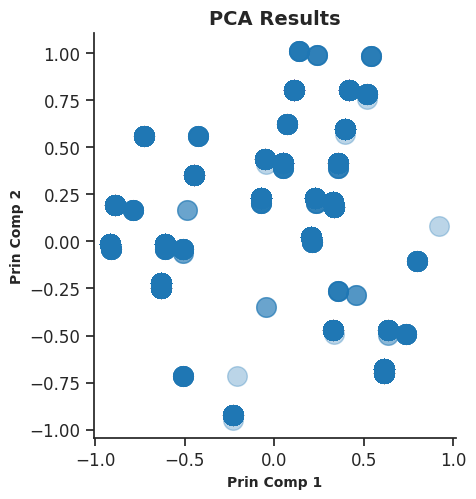

In [114]:
# Plot of PCA

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='score0',
           y='score1',
           data=transform_df,
           fit_reg=False,
           legend=True,
           #size=9,
           #hue='score2',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')
plt.savefig('pca_mental-health_client-level.png')

In [28]:
"""
#use sklearn t-SNE mapping
#only uses CPU and is very slow
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=1000, n_iter=500)
tsne_results = tsne.fit_transform(X)
#put the resulting numpy array into a dataframe
tsne_df = pd.DataFrame(columns=['tsne-2d-one','tsne-2d-two'])
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
"""

"\n#use sklearn t-SNE mapping\n#only uses CPU and is very slow\nfrom sklearn.manifold import TSNE\ntsne = TSNE(n_components=2, verbose=1, perplexity=1000, n_iter=500)\ntsne_results = tsne.fit_transform(X)\n#put the resulting numpy array into a dataframe\ntsne_df = pd.DataFrame(columns=['tsne-2d-one','tsne-2d-two'])\ntsne_df['tsne-2d-one'] = tsne_results[:,0]\ntsne_df['tsne-2d-two'] = tsne_results[:,1]\n"

In [29]:
#install GPU accelerator for CUDA
#https://medium.com/rapids-ai/tsne-with-gpus-hours-to-seconds-9d9c17c941db
#https://github.com/rapidsai/cuml
#https://docs.rapids.ai/install#selector
#https://github.com/CannyLab/tsne-cuda - NOTE: requires FAISS and MKL

In [19]:
"""
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12==24.2.* dask-cudf-cu12==24.2.* cuml-cu12==24.2.* \
    cugraph-cu12==24.2.* cuspatial-cu12==24.2.* cuproj-cu12==24.2.* \
    cuxfilter-cu12==24.2.* cucim-cu12==24.2.* pylibraft-cu12==24.2.* \
    raft-dask-cu12==24.2.*
"""

'\n!pip install     --extra-index-url=https://pypi.nvidia.com     cudf-cu12==24.2.* dask-cudf-cu12==24.2.* cuml-cu12==24.2.*     cugraph-cu12==24.2.* cuspatial-cu12==24.2.* cuproj-cu12==24.2.*     cuxfilter-cu12==24.2.* cucim-cu12==24.2.* pylibraft-cu12==24.2.*     raft-dask-cu12==24.2.*\n'

In [115]:
#use cuML GPU accelerated fit
from cuml.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 5)
tsne_results=tsne.fit_transform(X)
tsne_results.rename(columns={0: "tsne-2d-one", 1: "tsne-2d-two"}, inplace = True)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


In [116]:
tsne_results.shape

(10000, 2)

In [117]:
#NOTE:
#t-SNE depends heavily on perplexity
#ensure no id column got mixed in
tsne_results.head()

,tsne-2d-one,tsne-2d-two
0,-20.339052,-8.752538
1,11.138144,22.827522
2,-8.692016,21.415670
3,11.140021,22.828386
4,-25.917727,-30.271294


In [165]:
#just map 0/1 string to binary number
#too many categories. 2^7=128. need to reduce.
#so create a label for those which are purely 1 for some disorder, and 0 for all others
#use separate category for uncategorized data
#use this as a hue to color the graph
labels = []
for row in data[:NUM_POINTS].iterrows():
  #labels.append(sum(row[1][i]*2**i for i in range(len(data.columns))))
  no_disorder = sum(row[1]) == 0
  pure_disorder = sum(row[1]) == 1
  multi_disorder = sum(row[1]) > 1
  if no_disorder:
    #labels.append(0)
    labels.append('no_disorder')
  if pure_disorder:
    #get the columns as a list
    #then get index of disorder with value 1
    #add 1 since 0 is already taken
    #labels.append(list(data.columns).index(row[1][row[1] == 1].index[0]) + 1)
    labels.append(row[1][row[1] == 1].index[0])
  if multi_disorder:
    #labels.append(len(data.columns)+1)
    labels.append('multi-disorder')

label_df = pd.DataFrame(labels,columns=['label'])

In [166]:
label_df.head()

,label
0,DEPRESSFLG
1,SCHIZOFLG
2,no_disorder
3,SCHIZOFLG
4,multi-disorder


In [167]:
tsne_results_labeled = label_df.merge(tsne_results, left_index=True, right_index=True)

In [168]:
tsne_results_labeled

,label,tsne-2d-one,tsne-2d-two
0,DEPRESSFLG,-20.339052,-8.752538
1,SCHIZOFLG,11.138144,22.827522
2,no_disorder,-8.692016,21.415670
3,SCHIZOFLG,11.140021,22.828386
4,multi-disorder,-25.917727,-30.271294
...,...,...,...
9995,multi-disorder,1.760960,-24.198891
9996,DEPRESSFLG,-19.047297,-8.859685
9997,BIPOLARFLG,-4.696805,-2.318564
9998,DEPRESSFLG,-20.839838,-8.902621


<ipython-input-169-2c15b43e3529>:3: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  plot = sns.scatterplot(


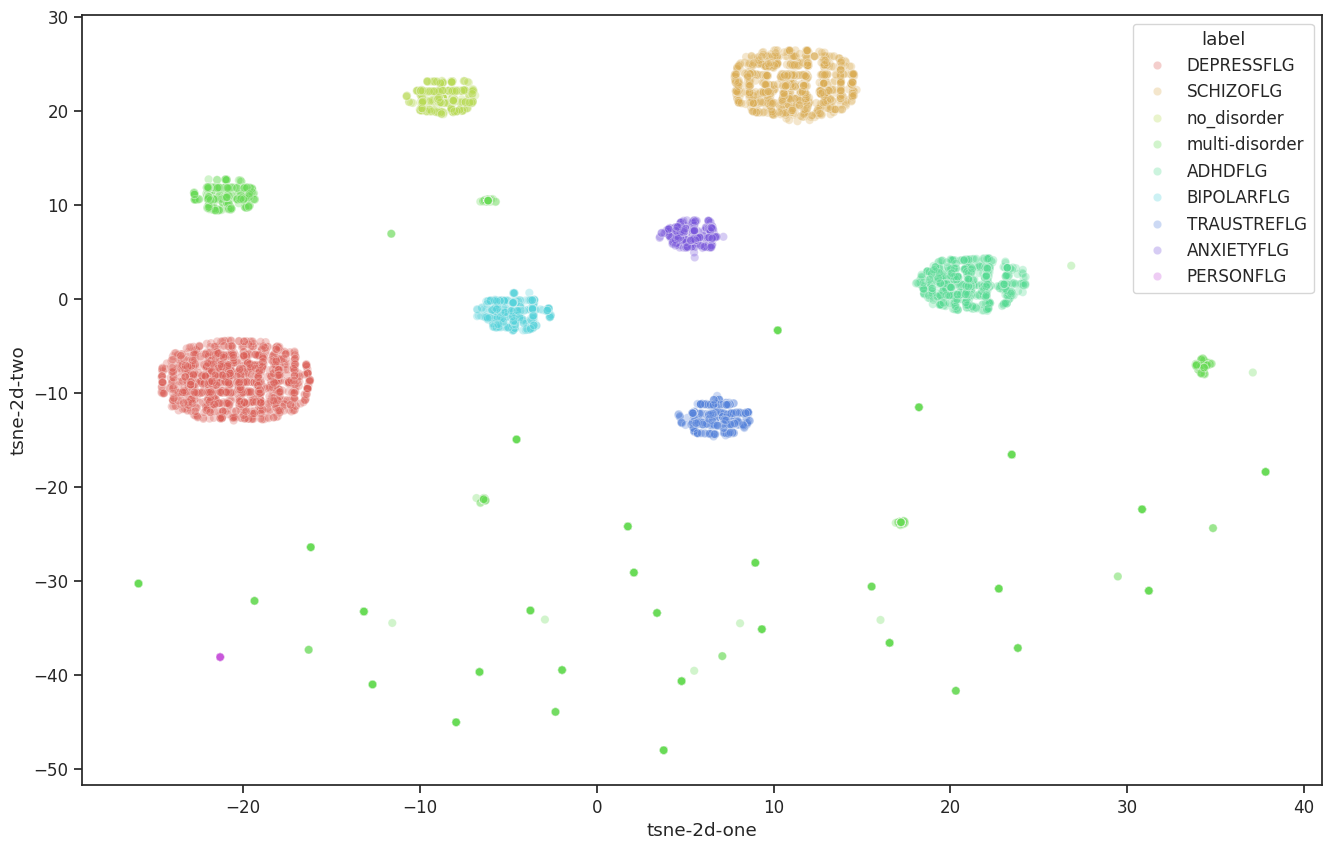

In [169]:
#plot the t-SNE results
plt.figure(figsize=(16,10))
plot = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_results_labeled,
    legend="full",
    alpha=0.3
)
#plot.set_xlim(-2000,2000)
#plot.set_ylim(-5000, 5000)

In [170]:
fig = plot.get_figure()
fig.savefig("/content/drive/MyDrive/colab_notebooks/plots/tsne_plot_mental-health_client-level-data_perplexity=10_num-points=10_000_labeled.png")